# Data Scaling And Normalization

In [63]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)


Often times, the word normalization and scaling are often used interchangeably. The are all related to the process of transforming data but they are abit different. While **scaling** deals with changing the range of the dataset, **normalization** deals with changing the shape of the dataset.

## Scaling

The aim of scaling the dataset is to change its range, basically make the data fit to a certain scale eg, 0-1. Ideally we use scaling when we are dealing with a model that rely on the distance of separation between data points to perform classification example SVM, K-Means or KNN.

The reason is that take for example a model working with Height and weights, the models will treat 1Kg change in weight at 1 inch change in height. Its not exactly clear how many inches equates to one Kilogram. To avoid this we need to scale our dataset.

In [64]:
original_data = np.random.exponential(size=1000)

minmax_scaler = MinMaxScaler()
scaled_data2 = minmax_scaler.fit_transform(original_data.reshape(-1, 1))

# scale the data set to a scale of 0 to 1
scaled_data = minmax_scaling(original_data, columns=[0])

Text(0.5, 1.0, 'Scaled data from MinMax Scaler')

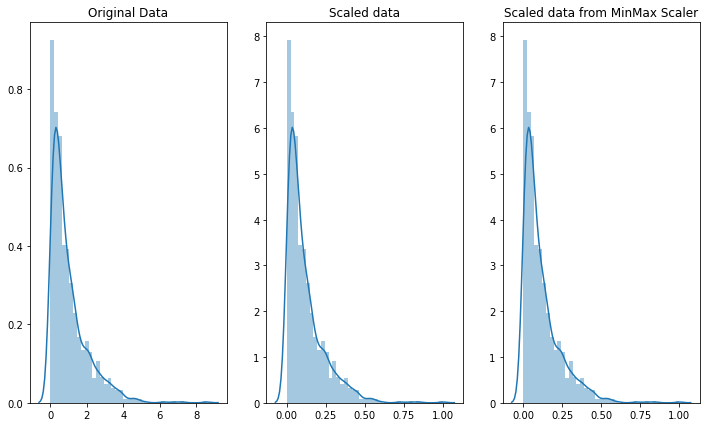

In [65]:
fig, ax = plt.subplots(1, 3, figsize = (12, 7))
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
sns.distplot(scaled_data2, ax=ax[2])
ax[2].set_title("Scaled data from MinMax Scaler")

From the above plot we can notice that the shape of the dataset does not change only the range does(0-1)

## Normalization

This will change the shape of the dataset, the aim is to change the shape so we can have a normaly distributed dataset. This will result into a bell shaped dataset. Normal distribution can sometimes be called **Gaussian Distributions.**

In [66]:
normalized_data = stats.boxcox(original_data)

Text(0.5, 1.0, 'Normalized Dataset')

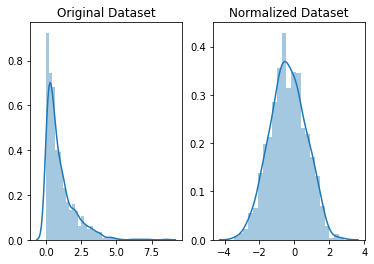

In [67]:
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, ax = ax[0])
ax[0].set_title("Original Dataset")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized Dataset")

We have now changed the shape of the dataset. We usually normalize a dataset when ever we are going to use a model that will assume the dataset has a normal distribution eg Naive Bayes or any model with the name Gaussian probably assumes a normally distributed dataset.

In [68]:
df = pd.read_csv('datasets/ks-projects-201612.csv',  encoding = "ISO-8859-1", low_memory = False)
# https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

In [69]:
df.shape

(323750, 17)

In [70]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [71]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [72]:
df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15','Unnamed: 16'], inplace = True, axis = 'columns')

In [73]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [74]:
df.shape

(323750, 13)

## Scaling

In [75]:
original_goal = pd.to_numeric(df['goal '], errors = 'coerce')
original_goal.dropna(how = 'any', inplace = True)

scaled_goal = minmax_scaling(original_goal, columns = [0])

Text(0.5, 1.0, 'Scaled Dataset')

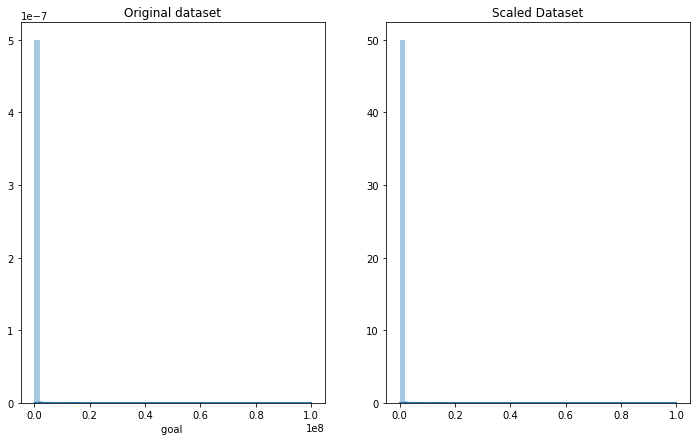

In [76]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(original_goal, ax=ax[0])
ax[0].set_title("Original dataset")
sns.distplot(scaled_goal, ax=ax[1])
ax[1].set_title("Scaled Dataset")

In [77]:
print(scaled_goal.min())
print(scaled_goal.max())

0.0
1.0


In [78]:
print(original_goal.min())
print(original_goal.max())

0.01
100000000.0


In [85]:
df['usd pledged '] = pd.to_numeric(df['usd pledged '], errors = 'coerce')
usd_pledged.dropna(how = 'any', inplace = True)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375.0


In [86]:
usd_pledge_above_zero = df['usd pledged '] > 0

In [87]:
usd_pledge_above_zero

0         False
1          True
2          True
3          True
4          True
          ...  
323745     True
323746     True
323747     True
323748     True
323749     True
Name: usd pledged , Length: 323750, dtype: bool

In [88]:
index_usd_pledge_above_zero = df['usd pledged '].loc[usd_pledge_above_zero]

In [89]:
index_usd_pledge_above_zero

1           220.0
2             1.0
3          1283.0
4         52375.0
5          1205.0
           ...   
323745       25.0
323746      155.0
323747       20.0
323748      200.0
323749      524.0
Name: usd pledged , Length: 268875, dtype: float64

In [92]:
normalized_usd_pledge = pd.Series(stats.boxcox(index_usd_pledge_above_zero)[0], name = "usd_pledge", 
                                 index = index_usd_pledge_above_zero.index)

Text(0.5, 1.0, 'Scaled Dataset')

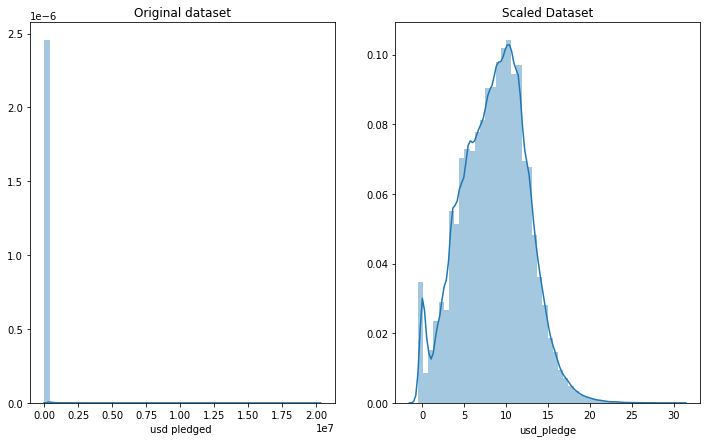

In [93]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(index_usd_pledge_above_zero, ax=ax[0])
ax[0].set_title("Original dataset")
sns.distplot(normalized_usd_pledge, ax=ax[1])
ax[1].set_title("Scaled Dataset")

https://www.kaggle.com/princekrampah/exercise-scaling-and-normalization/edit